### LGBM Model

In [52]:
import optuna
from optuna.samplers import TPESampler
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import roc_auc_score
sampler = TPESampler(seed=666)

def create_model(trial):
    num_leaves = trial.suggest_int("num_leaves", 2, 20)
    n_estimators = trial.suggest_int("n_estimators", 15, 50)
    max_depth = trial.suggest_int('max_depth', 3, 5)
    min_child_samples = trial.suggest_int('min_child_samples', 20, 100)
    learning_rate = trial.suggest_uniform('learning_rate', 0.0001, 0.99)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 5, 90)
    #bagging_fraction = trial.suggest_uniform('bagging_fraction', 0.0001, 1.0)
    feature_fraction = trial.suggest_uniform('feature_fraction', 0.0001, 1.0)
    model = LGBMClassifier(
        num_leaves=num_leaves,
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_child_samples=min_child_samples, 
        min_data_in_leaf=min_data_in_leaf,
        learning_rate=learning_rate,
        feature_fraction=feature_fraction,
        is_unbalance = True,
        random_state=666
)
    return model

def objective(trial):
    model = create_model(trial)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_train)
    print(y_pred)
    score = roc_auc_score(y_true = y_train,y_score = y_pred, multi_class = 'ovo',average = 'macro')
    #score = roc_auc_score(y_true = y_train,y_score = y_pred[:,1])
    return score

# uncomment to use optuna
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=20)

params = study.best_params
# params['random_state'] = 666
lgbm_model = LGBMClassifier(**params)
lgbm_model.fit(X_train, y_train)


[I 2021-01-07 18:03:10,327] A new study created in memory with name: no-name-ae05c00a-45df-4202-964f-975ef2982170


[LightGBM] [Warning] feature_fraction is set=0.7503555115920514, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7503555115920514
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=78
[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  1.00000000e+000 0.00000000e+000]
 [4.37563327e-233 1.05249856e-101 0.00000000e+000 ... 0.00000000e+000
  5.41221882e-015 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 1.00000000e+000]]


[I 2021-01-07 18:03:10,540] Trial 0 finished with value: 0.5052566980304787 and parameters: {'num_leaves': 14, 'n_estimators': 17, 'max_depth': 4, 'min_child_samples': 50, 'learning_rate': 0.6697815411446554, 'min_data_in_leaf': 78, 'feature_fraction': 0.7503555115920514}. Best is trial 0 with value: 0.5052566980304787.


[LightGBM] [Warning] feature_fraction is set=0.19297271384027967, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19297271384027967
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=66 will be ignored. Current value: min_data_in_leaf=74


[I 2021-01-07 18:03:10,848] Trial 1 finished with value: 0.5024254572576534 and parameters: {'num_leaves': 16, 'n_estimators': 48, 'max_depth': 3, 'min_child_samples': 66, 'learning_rate': 0.7594168633068964, 'min_data_in_leaf': 74, 'feature_fraction': 0.19297271384027967}. Best is trial 0 with value: 0.5052566980304787.


[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  6.06372895e-224 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  1.17702299e-223 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  2.13698187e-152 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  1.28285107e-163 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  0.00000000e+000 0.00000000e+000]]
[LightGBM] [Warning] feature_fraction is set=0.1129463678663448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1129463678663448
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=40 will be ignored. Current value: min_data_in_leaf=25


[I 2021-01-07 18:03:11,109] Trial 2 finished with value: 0.5019325374956222 and parameters: {'num_leaves': 17, 'n_estimators': 28, 'max_depth': 4, 'min_child_samples': 40, 'learning_rate': 0.7272903124321791, 'min_data_in_leaf': 25, 'feature_fraction': 0.1129463678663448}. Best is trial 0 with value: 0.5052566980304787.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[LightGBM] [Warning] feature_fraction is set=0.3498269285670176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3498269285670176
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=67 will be ignored. Current value: min_data_in_leaf=41


[I 2021-01-07 18:03:11,436] Trial 3 finished with value: 0.5095373747077551 and parameters: {'num_leaves': 18, 'n_estimators': 45, 'max_depth': 5, 'min_child_samples': 67, 'learning_rate': 0.7200752105773939, 'min_data_in_leaf': 41, 'feature_fraction': 0.3498269285670176}. Best is trial 3 with value: 0.5095373747077551.


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[LightGBM] [Warning] feature_fraction is set=0.3257580838683153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3257580838683153
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=84 will be ignored. Current value: min_data_in_leaf=43


[I 2021-01-07 18:03:11,839] Trial 4 finished with value: 0.987829764277119 and parameters: {'num_leaves': 12, 'n_estimators': 48, 'max_depth': 3, 'min_child_samples': 84, 'learning_rate': 0.2566146176903294, 'min_data_in_leaf': 43, 'feature_fraction': 0.3257580838683153}. Best is trial 4 with value: 0.987829764277119.


[[5.08063936e-09 1.36597894e-06 5.66136191e-08 ... 5.59675134e-01
  3.14413392e-01 1.25802644e-01]
 [2.06549291e-08 4.24347702e-06 2.55839132e-08 ... 4.38838307e-02
  2.07945873e-01 7.48113812e-01]
 [1.30121546e-07 3.30230832e-06 5.10363211e-08 ... 3.22207132e-01
  6.30170768e-01 4.75021145e-02]
 ...
 [4.50767391e-11 4.67912759e-08 7.72138734e-10 ... 4.28972759e-02
  9.55234518e-01 1.86439419e-03]
 [2.72042375e-08 3.66754628e-02 1.69738095e-08 ... 2.29151999e-03
  8.74343800e-04 2.59103198e-04]
 [1.42415795e-06 3.81148519e-06 2.18878590e-07 ... 1.66001553e-01
  3.36159174e-01 4.97715053e-01]]
[LightGBM] [Warning] feature_fraction is set=0.8728922497597293, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8728922497597293
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=47 will be ignored. Current value: min_data_in_leaf=43


[I 2021-01-07 18:03:12,131] Trial 5 finished with value: 0.4898113630247144 and parameters: {'num_leaves': 4, 'n_estimators': 42, 'max_depth': 5, 'min_child_samples': 47, 'learning_rate': 0.4126032146737233, 'min_data_in_leaf': 43, 'feature_fraction': 0.8728922497597293}. Best is trial 4 with value: 0.987829764277119.


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[LightGBM] [Warning] feature_fraction is set=0.979337648910152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.979337648910152
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=65 will be ignored. Current value: min_data_in_leaf=68


[I 2021-01-07 18:03:12,406] Trial 6 finished with value: 0.9750049400028912 and parameters: {'num_leaves': 8, 'n_estimators': 24, 'max_depth': 4, 'min_child_samples': 65, 'learning_rate': 0.0786407713728079, 'min_data_in_leaf': 68, 'feature_fraction': 0.979337648910152}. Best is trial 4 with value: 0.987829764277119.


[[6.12636867e-04 1.34419924e-03 6.13872972e-05 ... 4.59794095e-01
  4.44406396e-01 7.74902359e-02]
 [3.21271784e-04 7.05260218e-04 3.21895621e-05 ... 7.00385040e-02
  2.24727993e-01 6.95576195e-01]
 [3.61595736e-04 8.03442489e-04 3.66610876e-05 ... 2.49425214e-01
  6.85981229e-01 5.35705003e-02]
 ...
 [7.01422128e-04 5.89661849e-04 2.69293852e-05 ... 1.48008745e-01
  8.18800509e-01 2.47220815e-02]
 [9.16039605e-03 5.02820712e-03 1.26140671e-03 ... 2.78736952e-02
  4.13147585e-02 1.56110197e-02]
 [4.04371015e-04 8.87187132e-04 4.05184648e-05 ... 2.74555830e-01
  3.41242429e-01 3.72116756e-01]]
[LightGBM] [Warning] feature_fraction is set=0.8518031629289149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8518031629289149
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=67 will be ignored. Current value: min_data_in_leaf=52


[I 2021-01-07 18:03:12,713] Trial 7 finished with value: 0.9697999729282814 and parameters: {'num_leaves': 13, 'n_estimators': 22, 'max_depth': 5, 'min_child_samples': 67, 'learning_rate': 0.3312703959708388, 'min_data_in_leaf': 52, 'feature_fraction': 0.8518031629289149}. Best is trial 4 with value: 0.987829764277119.


[[2.70082272e-06 0.00000000e+00 8.67617389e-07 ... 7.03778516e-01
  2.67460370e-01 2.86147019e-02]
 [1.85147800e-06 5.61839920e-05 3.76851853e-07 ... 1.94005798e-02
  2.19288576e-01 7.61184024e-01]
 [1.81113555e-06 1.89447193e-20 4.76116877e-07 ... 3.11585934e-01
  6.44986426e-01 4.33137300e-02]
 ...
 [1.89282206e-04 2.71274163e-10 8.26479052e-08 ... 2.43866755e-02
  9.75169642e-01 2.37084635e-04]
 [2.09680641e-03 1.75179251e-04 1.98771389e-60 ... 1.60659609e-04
  2.29234199e-05 2.54979276e-06]
 [1.64737381e-07 0.00000000e+00 1.95353260e-08 ... 7.85436984e-02
  3.80193597e-01 5.41257298e-01]]
[LightGBM] [Warning] feature_fraction is set=0.3538428409059361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3538428409059361
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=45 will be ignored. Current value: min_data_in_leaf=9


[I 2021-01-07 18:03:13,001] Trial 8 finished with value: 0.5243750089176118 and parameters: {'num_leaves': 5, 'n_estimators': 34, 'max_depth': 4, 'min_child_samples': 45, 'learning_rate': 0.4400718605189868, 'min_data_in_leaf': 9, 'feature_fraction': 0.3538428409059361}. Best is trial 4 with value: 0.987829764277119.


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[LightGBM] [Warning] feature_fraction is set=0.4643617127520837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4643617127520837
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=72 will be ignored. Current value: min_data_in_leaf=31


[I 2021-01-07 18:03:13,269] Trial 9 finished with value: 0.5056698932019413 and parameters: {'num_leaves': 20, 'n_estimators': 20, 'max_depth': 3, 'min_child_samples': 72, 'learning_rate': 0.4159123032085516, 'min_data_in_leaf': 31, 'feature_fraction': 0.4643617127520837}. Best is trial 4 with value: 0.987829764277119.


[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [4.63622522e-219 1.00000000e+000 2.58619379e-211 ... 2.75778450e-204
  0.00000000e+000 2.60907383e-201]
 ...
 [2.47964053e-051 0.00000000e+000 2.96175267e-050 ... 1.00000000e+000
  0.00000000e+000 5.29892417e-049]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.00000000e+000
  0.00000000e+000 0.00000000e+000]]
[LightGBM] [Warning] feature_fraction is set=0.6421997378176294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6421997378176294
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=97 will be ignored. Current value: min_data_in_leaf=6


[I 2021-01-07 18:03:13,618] Trial 10 finished with value: 0.969635336399442 and parameters: {'num_leaves': 9, 'n_estimators': 38, 'max_depth': 3, 'min_child_samples': 97, 'learning_rate': 0.008364320776395179, 'min_data_in_leaf': 6, 'feature_fraction': 0.6421997378176294}. Best is trial 4 with value: 0.987829764277119.


[[2.04118637e-03 4.48713342e-03 2.07070674e-04 ... 3.31464513e-01
  4.72540036e-01 1.32965269e-01]
 [1.84209650e-03 4.04948957e-03 1.84317627e-04 ... 2.52609998e-01
  3.90971904e-01 2.99534068e-01]
 [1.74863679e-03 3.82879852e-03 1.74264007e-04 ... 2.80613209e-01
  5.54601893e-01 1.10967851e-01]
 ...
 [2.04902092e-03 4.24381464e-03 1.93161669e-04 ... 3.13486900e-01
  5.07981396e-01 1.18799726e-01]
 [3.83256529e-03 5.37442840e-03 2.01816036e-04 ... 2.19344841e-01
  3.31748360e-01 1.23521785e-01]
 [1.94584606e-03 4.27750571e-03 2.06462593e-04 ... 3.15982965e-01
  4.50469343e-01 1.73455040e-01]]
[LightGBM] [Warning] feature_fraction is set=0.027388318426573632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.027388318426573632
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=93 will be ignored. Current value: min_data_in_leaf=62


[I 2021-01-07 18:03:13,873] Trial 11 finished with value: 0.9170809059248324 and parameters: {'num_leaves': 9, 'n_estimators': 27, 'max_depth': 4, 'min_child_samples': 93, 'learning_rate': 0.1032373594055731, 'min_data_in_leaf': 62, 'feature_fraction': 0.027388318426573632}. Best is trial 4 with value: 0.987829764277119.


[[1.86151016e-03 4.28486990e-03 2.35703392e-02 ... 2.95471943e-01
  4.90151883e-01 1.34776234e-01]
 [1.55769175e-03 5.93342172e-03 1.62946882e-04 ... 2.69643204e-01
  4.12465425e-01 2.76682831e-01]
 [2.16523264e-03 5.34506258e-03 1.51841880e-04 ... 3.26472254e-01
  5.10255608e-01 1.07061786e-01]
 ...
 [6.86486273e-03 2.77612607e-03 1.07824910e-04 ... 2.50628679e-01
  6.29566799e-01 8.02126514e-02]
 [9.14845302e-03 2.01879489e-02 4.40390031e-04 ... 1.77834826e-01
  3.29192557e-01 9.77918806e-02]
 [1.40395609e-03 4.64785647e-03 2.08320506e-04 ... 3.14038515e-01
  4.53201039e-01 1.77448603e-01]]
[LightGBM] [Warning] feature_fraction is set=0.5849625024962621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5849625024962621
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90


[I 2021-01-07 18:03:14,181] Trial 12 finished with value: 0.979521430862272 and parameters: {'num_leaves': 7, 'n_estimators': 26, 'max_depth': 3, 'min_child_samples': 20, 'learning_rate': 0.2039935883137419, 'min_data_in_leaf': 90, 'feature_fraction': 0.5849625024962621}. Best is trial 4 with value: 0.987829764277119.


[[3.26665410e-05 4.56627280e-05 2.08069068e-06 ... 5.81603459e-01
  2.86006751e-01 1.31455712e-01]
 [1.91021351e-05 7.89525006e-05 1.23683093e-06 ... 4.77294735e-02
  1.55526424e-01 7.96136772e-01]
 [4.69828619e-05 2.51172683e-04 1.73702486e-06 ... 2.41186077e-01
  7.16228580e-01 4.14504166e-02]
 ...
 [3.25263624e-04 8.86116516e-06 4.67220678e-07 ... 1.00231246e-01
  8.92521343e-01 6.70479548e-03]
 [9.78337179e-03 3.71005779e-04 1.19641215e-05 ... 4.32636809e-02
  2.33257558e-02 7.66480698e-03]
 [5.90406303e-05 1.09917578e-04 2.55142709e-06 ... 2.04851410e-01
  3.46716092e-01 4.47147803e-01]]
[LightGBM] [Warning] feature_fraction is set=0.5774314563293451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5774314563293451
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=21 will be ignored. Current value: min_data_in_leaf=58


[I 2021-01-07 18:03:14,454] Trial 13 finished with value: 0.9723563642087877 and parameters: {'num_leaves': 2, 'n_estimators': 32, 'max_depth': 3, 'min_child_samples': 21, 'learning_rate': 0.22468383021280222, 'min_data_in_leaf': 58, 'feature_fraction': 0.5774314563293451}. Best is trial 4 with value: 0.987829764277119.


[[6.11548073e-05 2.64205301e-04 2.34224516e-04 ... 3.87284815e-01
  4.79558806e-01 1.31623096e-01]
 [3.00501948e-05 2.07673675e-04 1.40853636e-05 ... 9.80841885e-02
  2.35645179e-01 6.65447464e-01]
 [4.13459981e-05 1.18126707e-03 1.47926601e-05 ... 2.43038442e-01
  6.99987380e-01 5.48710321e-02]
 ...
 [4.23958013e-03 4.21014199e-05 5.45416559e-06 ... 1.78668999e-01
  7.87124298e-01 2.93221653e-02]
 [1.11383569e-02 7.49744238e-03 2.03205557e-04 ... 2.45799747e-02
  2.39482240e-02 6.37194789e-03]
 [5.02933321e-05 2.17280792e-04 3.41666224e-05 ... 3.18500617e-01
  3.94386171e-01 2.85610093e-01]]
[LightGBM] [Warning] feature_fraction is set=0.34469117259230986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34469117259230986
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=85 will be ignored. Current value: min_data_in_leaf=90


[I 2021-01-07 18:03:14,921] Trial 14 finished with value: 0.986162102900183 and parameters: {'num_leaves': 12, 'n_estimators': 50, 'max_depth': 3, 'min_child_samples': 85, 'learning_rate': 0.229802634349541, 'min_data_in_leaf': 90, 'feature_fraction': 0.34469117259230986}. Best is trial 4 with value: 0.987829764277119.


[[6.06665829e-07 3.48680817e-06 1.19616957e-05 ... 6.74237491e-01
  2.27091855e-01 9.84515236e-02]
 [8.38391084e-07 3.33225942e-05 1.41429957e-08 ... 3.40393169e-02
  1.68173624e-01 7.97639574e-01]
 [6.34763380e-06 6.63573438e-05 3.40567235e-08 ... 2.39145345e-01
  7.16420011e-01 4.41309630e-02]
 ...
 [5.66975730e-05 9.81724508e-07 2.79378169e-09 ... 7.92294941e-02
  9.18369442e-01 2.30688298e-03]
 [4.70490473e-03 6.88226498e-04 6.39536777e-06 ... 1.63054399e-02
  4.26500684e-03 1.18703469e-03]
 [9.38504556e-06 1.23340061e-04 1.18004100e-07 ... 1.55017904e-01
  3.12930961e-01 5.31740724e-01]]
[LightGBM] [Warning] feature_fraction is set=0.3035399949509266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3035399949509266
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=87 will be ignored. Current value: min_data_in_leaf=28


[I 2021-01-07 18:03:15,280] Trial 15 finished with value: 0.5022857270962777 and parameters: {'num_leaves': 12, 'n_estimators': 50, 'max_depth': 3, 'min_child_samples': 87, 'learning_rate': 0.9428922022925267, 'min_data_in_leaf': 28, 'feature_fraction': 0.3035399949509266}. Best is trial 4 with value: 0.987829764277119.


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[LightGBM] [Warning] feature_fraction is set=0.22609773791594753, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22609773791594753
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=80 will be ignored. Current value: min_data_in_leaf=87


[I 2021-01-07 18:03:15,707] Trial 16 finished with value: 0.9830672113083971 and parameters: {'num_leaves': 11, 'n_estimators': 50, 'max_depth': 3, 'min_child_samples': 80, 'learning_rate': 0.24017291687218356, 'min_data_in_leaf': 87, 'feature_fraction': 0.22609773791594753}. Best is trial 4 with value: 0.987829764277119.


[[4.49665141e-07 4.11857281e-06 5.52828924e-06 ... 6.34936222e-01
  2.51939658e-01 1.12780300e-01]
 [5.17775175e-07 1.36749687e-04 1.16359223e-06 ... 5.72725828e-02
  1.77787657e-01 7.64595743e-01]
 [4.44324877e-06 3.41665906e-05 4.97686376e-07 ... 2.74790897e-01
  6.76015560e-01 4.85965769e-02]
 ...
 [1.18282260e-04 5.11443048e-07 1.78104364e-08 ... 8.70309130e-02
  9.09980058e-01 2.80153403e-03]
 [9.82539444e-03 1.22037578e-02 2.49321697e-06 ... 1.21948986e-02
  4.55742726e-03 8.65486330e-04]
 [1.04683081e-06 3.35218260e-05 5.68129010e-06 ... 1.92882475e-01
  3.08576433e-01 4.98162669e-01]]
[LightGBM] [Warning] feature_fraction is set=0.44481970145475, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44481970145475
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=87 will be ignored. Current value: min_data_in_leaf=21


[I 2021-01-07 18:03:16,019] Trial 17 finished with value: 0.4985567464268439 and parameters: {'num_leaves': 15, 'n_estimators': 44, 'max_depth': 3, 'min_child_samples': 87, 'learning_rate': 0.5724582569458536, 'min_data_in_leaf': 21, 'feature_fraction': 0.44481970145475}. Best is trial 4 with value: 0.987829764277119.


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[LightGBM] [Warning] feature_fraction is set=0.08662787907258651, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08662787907258651
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=36


[I 2021-01-07 18:03:16,378] Trial 18 finished with value: 0.967578765850977 and parameters: {'num_leaves': 11, 'n_estimators': 39, 'max_depth': 3, 'min_child_samples': 100, 'learning_rate': 0.31412213260188576, 'min_data_in_leaf': 36, 'feature_fraction': 0.08662787907258651}. Best is trial 4 with value: 0.987829764277119.


[[8.85094634e-07 2.53614086e-05 3.88130792e-06 ... 3.89235775e-01
  4.49185415e-01 1.60331878e-01]
 [3.09249719e-07 7.25581332e-05 2.07906980e-06 ... 4.52353868e-02
  1.68819247e-01 7.85504487e-01]
 [2.01331962e-06 1.83433736e-04 6.36065402e-07 ... 2.80123363e-01
  6.69500566e-01 4.72190857e-02]
 ...
 [2.02237663e-07 1.35436773e-06 3.23170613e-08 ... 1.14377871e-01
  8.82338163e-01 2.85125010e-03]
 [8.15481330e-03 2.54491714e-02 7.84571012e-05 ... 1.76758447e-02
  2.45220455e-02 5.30721198e-03]
 [4.72123213e-06 2.59332438e-04 5.23598334e-06 ... 2.54858211e-01
  3.05733930e-01 4.37921573e-01]]
[LightGBM] [Warning] feature_fraction is set=0.24929637266490445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24929637266490445
[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=81 will be ignored. Current value: min_data_in_leaf=51


[I 2021-01-07 18:03:16,815] Trial 19 finished with value: 0.9837699550385886 and parameters: {'num_leaves': 19, 'n_estimators': 47, 'max_depth': 4, 'min_child_samples': 81, 'learning_rate': 0.12775156731224346, 'min_data_in_leaf': 51, 'feature_fraction': 0.24929637266490445}. Best is trial 4 with value: 0.987829764277119.


[[1.81746630e-05 5.07559890e-05 1.05607016e-05 ... 4.77454239e-01
  4.11998625e-01 1.09519880e-01]
 [1.26487782e-05 6.51793162e-05 4.81890987e-06 ... 5.68668802e-02
  1.85383773e-01 7.57110275e-01]
 [2.49233875e-05 1.16994919e-04 9.81019103e-06 ... 2.40791813e-01
  7.00022178e-01 5.73112187e-02]
 ...
 [3.82329930e-04 1.08131339e-05 4.12449781e-07 ... 6.29904179e-02
  9.31385789e-01 5.01547338e-03]
 [8.78906561e-03 3.17977160e-03 1.01507718e-06 ... 2.00681381e-02
  1.47300621e-02 5.48055815e-03]
 [3.13684568e-05 1.09709957e-04 1.49884231e-05 ... 2.64687590e-01
  3.14966698e-01 4.18717870e-01]]
[LightGBM] [Warning] feature_fraction is set=0.3257580838683153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3257580838683153
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=84 will be ignored. Current value: min_data_in_leaf=43


LGBMClassifier(feature_fraction=0.3257580838683153,
               learning_rate=0.2566146176903294, max_depth=3,
               min_child_samples=84, min_data_in_leaf=43, n_estimators=48,
               num_leaves=12)

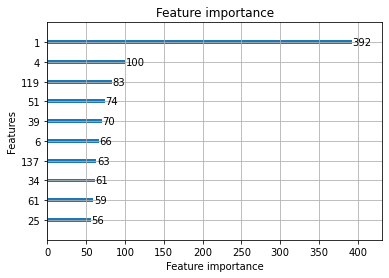

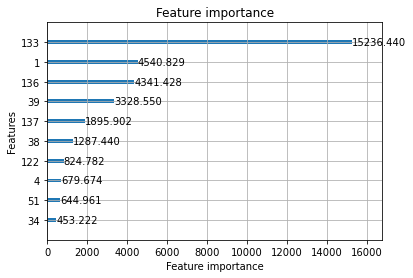

In [53]:
#displaying the most important features by split
plot_importance(lgbm_model, max_num_features = 10)
plt.show()
plot_importance(lgbm_model, importance_type = 'gain', max_num_features = 10)
plt.show()

In [54]:
lgbm_pred = lgbm_model.predict(X_test)

print('LGBM Train Accuracy',str(round(lgbm_model.score(X_train, y_train), 4)))
print('LGBM Test Accuracy',str(round(lgbm_model.score(X_test, y_test), 4)))
print('LGBM Precission',str(precision_score(y_test, lgbm_pred, average='weighted')))
print('LGBM Recall',str(recall_score(y_test, lgbm_pred, average='weighted')))
print(classification_report(y_test, lgbm_pred,target_names=None))
print(confusion_matrix(y_test, lgbm_pred,labels=["Close - Issue","Close - Non Issue"]))

LGBM Train Accuracy 0.7769
LGBM Test Accuracy 0.7332
LGBM Precission 0.7363766433144674
LGBM Recall 0.7331932773109243
                        precision    recall  f1-score   support

            Bulk Close       0.50      1.00      0.67         1
Close - False Positive       0.24      0.44      0.31         9
         Close - Issue       0.00      0.00      0.00         1
     Close - Non Issue       0.90      0.92      0.91       120
Close - Out Of Context       1.00      0.21      0.35        14
                Closed       0.33      0.50      0.40         2
            In Process       0.71      0.63      0.67       549
         Investigating       0.76      0.78      0.77       868
                   New       0.68      0.74      0.71       340

              accuracy                           0.73      1904
             macro avg       0.57      0.58      0.53      1904
          weighted avg       0.74      0.73      0.73      1904

[[  0   0]
 [  0 110]]


In [55]:
# save the model to disk
file_name = '\lgbm_model'+ '_' + dttm +'.pkl'
pickle.dump(lgbm_model, open(model_path + file_name, 'wb'))

### Bagging Model

In [ ]:
import optuna
from optuna.samplers import TPESampler
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import roc_auc_score
sampler = TPESampler(seed=666)

def create_model(trial):
    #num_leaves = trial.suggest_int("num_leaves", 2, 20)
    n_estimators = trial.suggest_int("n_estimators", 15, 50)
    max_samples = trial.suggest_int("max_samples", 500, 2000)
    max_features = trial.suggest_int("max_features", 10, 100)
    #max_depth = trial.suggest_int('max_depth', 3, 5)
    #min_child_samples = trial.suggest_int('min_child_samples', 20, 100)
    #learning_rate = trial.suggest_uniform('learning_rate', 0.0001, 0.99)
    #min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 5, 90)
    #bagging_fraction = trial.suggest_uniform('bagging_fraction', 0.0001, 1.0)
    #feature_fraction = trial.suggest_uniform('feature_fraction', 0.0001, 1.0)
    model = ensemble.BaggingClassifier(
        #num_leaves=num_leaves,
        n_estimators=n_estimators, 
        #max_depth=max_depth, 
        #min_child_samples=min_child_samples, 
        #min_data_in_leaf=min_data_in_leaf,
        #learning_rate=learning_rate,
        #feature_fraction=feature_fraction,
        random_state=666
)
    return model

def objective(trial):
    model = create_model(trial)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_train)
    print(y_pred)
    score = roc_auc_score(y_true = y_train,y_score = y_pred, multi_class = 'ovo',average = 'macro')
    return score

# uncomment to use optuna
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=20)

params = study.best_params
# params['random_state'] = 666
bagging_model = ensemble.BaggingClassifier(**params)
bagging_model.fit(X_train, y_train)

In [ ]:
bagging_pred = bagging_model.predict(X_test)

print('bagging Train Accuracy',str(round(bagging_model.score(X_train, y_train), 4)))
print('bagging Test Accuracy',str(round(bagging_model.score(X_test, y_test), 4)))
print('bagging Precission',str(precision_score(y_test, bagging_pred, average='weighted')))
print('bagging Recall',str(recall_score(y_test, bagging_pred, average='weighted')))

## Prediction

In [ ]:
new_alert = train_df.iloc[[0],:]
print(new_alert)

# define file paths
pipeline_file_name = "\data_processing_pipeline.pkl"
model_file_name = "\lgbm_model.pkl"

# Load Data Processing pipeline
pipeline = pickle.load(open(model_path + pipeline_file_name, 'rb'))

# perform data processing on new alert
new_alert_transformed = pipeline.transform(new_alert)

# Load Model
model = pickle.load(open(model_path+ model_file_name, 'rb'))

# Predict
model.predict(new_alert_transformed)